# 在数据中加入情感
基于NRC字典的情感分析

https://chengjun.github.io/mybook/11-3-NRC-Chinese-dict.html

1. 对所有的活跃用户推文跑出各类情感词的数量
2. 将情感词频率作为特征纳入固定效应模型
3. 如果可能，再对所有原创推文做同样的事
4. 如果还可能，再做出情感词的时间序列

In [1]:
import pandas as pd

In [2]:
lexicon_df = pd.read_excel("H:/课程/毕业论文/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon.xlsx")
lexicon_df.head()

,word,emotion,value
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [3]:
lexicon_df[:10]

,word,emotion,value
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [4]:
lexicon_df.emotion.unique().tolist()

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust']

In [5]:
lexicon_df[lexicon_df.emotion=='anger'][lexicon_df.value==1][['word','value']].reset_index(drop=True)

C:\Windows\Temp\ipykernel_26684\3382447542.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lexicon_df[lexicon_df.emotion=='anger'][lexicon_df.value==1][['word','value']].reset_index(drop=True)


,word,value
0,abandoned,1
1,abandonment,1
2,abhor,1
3,abhorrent,1
4,abolish,1
...,...,...
1240,wrongful,1
1241,wrongly,1
1242,yell,1
1243,yelp,1


In [6]:
# 构建情感词列表
Positive, Negative, Anger, Anticipation, Disgust, Fear, Joy, Sadness, Surprise, Trust= [[] for i in range(10)]

In [7]:
Positive=lexicon_df[lexicon_df.emotion=='positive'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Negative=lexicon_df[lexicon_df.emotion=='negative'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Anger=lexicon_df[lexicon_df.emotion=='anger'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Anticipation=lexicon_df[lexicon_df.emotion=='anticipation'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Disgust=lexicon_df[lexicon_df.emotion=='disgust'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Fear=lexicon_df[lexicon_df.emotion=='fear'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Joy=lexicon_df[lexicon_df.emotion=='joy'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Sadness=lexicon_df[lexicon_df.emotion=='sadness'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Surprise=lexicon_df[lexicon_df.emotion=='surprise'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
Trust=lexicon_df[lexicon_df.emotion=='trust'][lexicon_df.value==1][['word','value']].reset_index(drop=True)

C:\Windows\Temp\ipykernel_26684\135569679.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Positive=lexicon_df[lexicon_df.emotion=='positive'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
C:\Windows\Temp\ipykernel_26684\135569679.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Negative=lexicon_df[lexicon_df.emotion=='negative'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
C:\Windows\Temp\ipykernel_26684\135569679.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Anger=lexicon_df[lexicon_df.emotion=='anger'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
C:\Windows\Temp\ipykernel_26684\135569679.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Anticipation=lexicon_df[lexicon_df.emotion=='anticipation'][lexicon_df.value==1][['word','value']].reset_index(drop=True)
C:\Windows\Temp\ipykernel_26684\135569

In [8]:
Anger.head()

,word,value
0,abandoned,1
1,abandonment,1
2,abhor,1
3,abhorrent,1
4,abolish,1


In [9]:
Trust.head()

,word,value
0,abacus,1
1,abbot,1
2,absolution,1
3,abundance,1
4,academic,1


In [10]:
data = pd.read_csv("H:/课程/毕业论文/active_User_per_30_days_processed.csv")

In [11]:
data.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut,Tweet_content_clean,url_num,at_num,emoji_num,User_infuluence_score
0,0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,...,Harm,Non,Non,Non,0,"['putin', 'war', 'ukrain', 'russia', 'crisi', ...",1,0,0,1.155039
1,1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,...,Care,Non,Non,Non,0,"['proud', 'moment', 'indiatwo', 'young', 'shin...",1,0,0,0.273474
2,2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,...,Harm,Non,Non,Non,0,"['russia', 'vs', 'ukrain', 'war', 'updat', '',...",1,0,0,7.575000
3,3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,...,Harm,Non,Non,Non,0,"['putin', 'war', '', 'interest', 'detail', 'te...",1,0,0,1.155039
4,4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,...,Non,Non,Degradation,Mixed,0,"['crimin', 'russia', '', 'iran', '', 'syria', ...",1,0,4,2.186667


In [12]:
test_content = data.loc[0].Tweet_content_clean

In [13]:
test_content

"['putin', 'war', 'ukrain', 'russia', 'crisi', 'ukraina', 'ukrain', 'crisi', 'ukrain', 'volodymyr', 'zelenski', '', 'vladimir', 'putin', 'last', 'warn', '', '', 'url']"

In [14]:
import nltk
from ast import literal_eval
test_content = literal_eval(test_content)

In [15]:
test_content

['putin',
 'war',
 'ukrain',
 'russia',
 'crisi',
 'ukraina',
 'ukrain',
 'crisi',
 'ukrain',
 'volodymyr',
 'zelenski',
 '',
 'vladimir',
 'putin',
 'last',
 'warn',
 '',
 '',
 'url']

## 将感情词表转换为词干，并删除多余元素

In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [17]:
Positive.head()

,word,value
0,abba,1
1,ability,1
2,abovementioned,1
3,absolute,1
4,absolution,1


In [18]:
def word_stem(word):
    return ps.stem(word)

In [19]:
Positive.word = Positive.word.apply(word_stem)

In [20]:
Positive.head()

,word,value
0,abba,1
1,abil,1
2,abovement,1
3,absolut,1
4,absolut,1


In [21]:
Positive = Positive.drop_duplicates(subset='word', keep='last').reset_index(drop=True)

In [22]:
Positive.head()

,word,value
0,abba,1
1,abil,1
2,abovement,1
3,absolut,1
4,absorb,1


In [23]:
Negative.word = Negative.word.apply(word_stem)
Anger.word = Anger.word.apply(word_stem)
Anticipation.word = Anticipation.word.apply(word_stem)
Disgust.word = Disgust.word.apply(word_stem)
Fear.word = Fear.word.apply(word_stem)
Joy.word = Joy.word.apply(word_stem)
Sadness.word = Sadness.word.apply(word_stem)
Surprise.word = Surprise.word.apply(word_stem)
Trust.word = Trust.word.apply(word_stem)

In [24]:
Negative=Negative.drop_duplicates(subset='word', keep='last').reset_index(drop=True)
Anger= Anger.drop_duplicates(subset='word', keep='last').reset_index(drop=True)
Anticipation= Anticipation.drop_duplicates(subset='word', keep='last').reset_index(drop=True)
Disgust= Disgust.drop_duplicates(subset='word', keep='last').reset_index(drop=True)
Fear= Fear.drop_duplicates(subset='word', keep='last').reset_index(drop=True)
Joy= Joy.drop_duplicates(subset='word', keep='last').reset_index(drop=True)
Sadness= Sadness.drop_duplicates(subset='word', keep='last').reset_index(drop=True)
Surprise= Surprise.drop_duplicates(subset='word', keep='last').reset_index(drop=True)
Trust= Trust.drop_duplicates(subset='word', keep='last').reset_index(drop=True)

In [25]:
Anger.head()

,word,value
0,abandon,1
1,abhor,1
2,abhorr,1
3,abolish,1
4,abomin,1


In [26]:
def emotion_caculate(tweets):
    positive, negative, anger, anticipation, disgust, fear, joy, sadness, surprise, trust = [0 for i in range(10)]
    
    wordlist = tweets
    wordset = set(wordlist)
    wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive+=freq
        if word in Negative:
            negative+=freq
        if word in Anger:
            anger+=freq  
        if word in Anticipation:
            anticipation+=freq
        if word in Disgust:
            disgust+=freq
        if word in Fear:
            fear+=freq
        if word in Joy:
            joy+=freq
        if word in Sadness:
            sadness+=freq
        if word in Surprise:
            surprise+=freq
        if word in Trust:
            trust+=freq
            
    emotion_info = {
        'positive': positive,
        'negative': negative,
        'anger': anger,
        'anticipation': anticipation,
        'disgust': disgust,
        'fear':fear,
        'joy':joy,
        'sadness':sadness,
        'surprise':surprise,
        'trust':trust,
        'length':len(wordlist)
    }
    return emotion_info
        

In [27]:
emotion_caculate(test_content)

{'positive': 0,
 'negative': 0,
 'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0,
 'length': 19}

In [28]:
data.Tweet_content_clean = data.Tweet_content_clean.apply(literal_eval)

In [29]:
data.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,care_cat,fairness_cat,purity_cat,loyalty_cat,30day_cut,Tweet_content_clean,url_num,at_num,emoji_num,User_infuluence_score
0,0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,...,Harm,Non,Non,Non,0,"[putin, war, ukrain, russia, crisi, ukraina, u...",1,0,0,1.155039
1,1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,...,Care,Non,Non,Non,0,"[proud, moment, indiatwo, young, shine, star, ...",1,0,0,0.273474
2,2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,...,Harm,Non,Non,Non,0,"[russia, vs, ukrain, war, updat, , germani, ha...",1,0,0,7.575000
3,3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,...,Harm,Non,Non,Non,0,"[putin, war, , interest, detail, territori, co...",1,0,0,1.155039
4,4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,...,Non,Non,Degradation,Mixed,0,"[crimin, russia, , iran, , syria, , world, s, ...",1,0,4,2.186667


In [30]:
test_df = data[:10]

In [31]:
emotion_caculate(test_df.Tweet_content_clean[0])

{'positive': 0,
 'negative': 0,
 'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0,
 'length': 19}

In [40]:
test_df['emotions'] = test_df.Tweet_content_clean.apply(emotion_caculate)

C:\Windows\Temp\ipykernel_26684\255568455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['emotions'] = test_df.Tweet_content_clean.apply(emotion_caculate)


In [41]:
data['emotions'] = data.Tweet_content_clean.apply(emotion_caculate)

In [42]:
data.emotions[0].values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19])

In [43]:
data.loc[0].emotions['positive']

0

In [56]:
data.emotions

0          {'positive': 0, 'negative': 0, 'anger': 0, 'an...
1          {'positive': 0, 'negative': 0, 'anger': 0, 'an...
2          {'positive': 0, 'negative': 0, 'anger': 0, 'an...
3          {'positive': 0, 'negative': 0, 'anger': 0, 'an...
4          {'positive': 0, 'negative': 0, 'anger': 0, 'an...
                                 ...                        
2730748    {'positive': 0, 'negative': 0, 'anger': 0, 'an...
2730749    {'positive': 0, 'negative': 0, 'anger': 0, 'an...
2730750    {'positive': 0, 'negative': 0, 'anger': 0, 'an...
2730751    {'positive': 0, 'negative': 0, 'anger': 0, 'an...
2730752    {'positive': 0, 'negative': 0, 'anger': 0, 'an...
Name: emotions, Length: 2730753, dtype: object

In [51]:
indexs = ['length', 'positive', 'negative', 'anger', 'anticipation','disgust','fear','joy','sadness','surprise','trust']

In [57]:
emo_df = pd.DataFrame(data.emotions.tolist())

In [58]:
emo_df

,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,length
0,0,0,0,0,0,0,0,0,0,0,19
1,0,0,0,0,0,0,0,0,0,0,34
2,0,0,0,0,0,0,0,0,0,0,32
3,0,0,0,0,0,0,0,0,0,0,26
4,0,0,0,0,0,0,0,0,0,0,53
...,...,...,...,...,...,...,...,...,...,...,...
2730748,0,0,0,0,0,0,0,0,0,0,28
2730749,0,0,0,0,0,0,0,0,0,0,5
2730750,0,0,0,0,0,0,0,0,0,0,18
2730751,0,0,0,0,0,0,0,0,0,0,26


In [61]:
data.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,fairness_cat,purity_cat,loyalty_cat,30day_cut,Tweet_content_clean,url_num,at_num,emoji_num,User_infuluence_score,emotions
0,0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,...,Non,Non,Non,0,"[putin, war, ukrain, russia, crisi, ukraina, u...",1,0,0,1.155039,"{'positive': 0, 'negative': 0, 'anger': 0, 'an..."
1,1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,...,Non,Non,Non,0,"[proud, moment, indiatwo, young, shine, star, ...",1,0,0,0.273474,"{'positive': 0, 'negative': 0, 'anger': 0, 'an..."
2,2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,...,Non,Non,Non,0,"[russia, vs, ukrain, war, updat, , germani, ha...",1,0,0,7.575000,"{'positive': 0, 'negative': 0, 'anger': 0, 'an..."
3,3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,...,Non,Non,Non,0,"[putin, war, , interest, detail, territori, co...",1,0,0,1.155039,"{'positive': 0, 'negative': 0, 'anger': 0, 'an..."
4,4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,...,Non,Degradation,Mixed,0,"[crimin, russia, , iran, , syria, , world, s, ...",1,0,4,2.186667,"{'positive': 0, 'negative': 0, 'anger': 0, 'an..."


In [66]:
data = pd.concat([data,emo_df],axis=1)

In [68]:
data.head()

,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,Username,...,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,length
0,0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",anyidea,...,0,0,0,0,0,0,0,0,0,19
1,1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",AhmedFidous,...,0,0,0,0,0,0,0,0,0,34
2,2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",prime_scoop,...,0,0,0,0,0,0,0,0,0,32
3,3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",anyidea,...,0,0,0,0,0,0,0,0,0,26
4,4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",Basel_Saneeb,...,0,0,0,0,0,0,0,0,0,53


In [69]:
data[indexs].describe()

,length,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
count,2.730753e+06,2.730753e+06,2.730753e+06,2.730753e+06,2.730753e+06,2.730753e+06,2.730753e+06,2.730753e+06,2.730753e+06,2.730753e+06,2.730753e+06
mean,2.312559e+01,6.438151e-03,6.438151e-03,6.438151e-03,6.438151e-03,6.438151e-03,6.438151e-03,6.438151e-03,6.438151e-03,6.438151e-03,6.438151e-03
std,1.291206e+01,8.354456e-02,8.354456e-02,8.354456e-02,8.354456e-02,8.354456e-02,8.354456e-02,8.354456e-02,8.354456e-02,8.354456e-02,8.354456e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.280000e+02,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [74]:
emo_pt = pd.pivot_table(data,index='Datetime',values=indexs,aggfunc=np.mean)

In [75]:
emo_pt

,anger,anticipation,disgust,fear,joy,length,negative,positive,sadness,surprise,trust
Datetime,,,,,,,,,,,
2022-02-22,0.012500,0.012500,0.012500,0.012500,0.012500,34.662500,0.012500,0.012500,0.012500,0.012500,0.012500
2022-02-23,0.013258,0.013258,0.013258,0.013258,0.013258,26.083333,0.013258,0.013258,0.013258,0.013258,0.013258
2022-02-24,0.005671,0.005671,0.005671,0.005671,0.005671,21.571923,0.005671,0.005671,0.005671,0.005671,0.005671
2022-02-25,0.006722,0.006722,0.006722,0.006722,0.006722,21.430669,0.006722,0.006722,0.006722,0.006722,0.006722
2022-02-26,0.006578,0.006578,0.006578,0.006578,0.006578,21.532642,0.006578,0.006578,0.006578,0.006578,0.006578
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-17,0.006130,0.006130,0.006130,0.006130,0.006130,23.761280,0.006130,0.006130,0.006130,0.006130,0.006130
2022-09-18,0.007017,0.007017,0.007017,0.007017,0.007017,23.350832,0.007017,0.007017,0.007017,0.007017,0.007017
2022-09-19,0.004705,0.004705,0.004705,0.004705,0.004705,23.140745,0.004705,0.004705,0.004705,0.004705,0.004705


array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

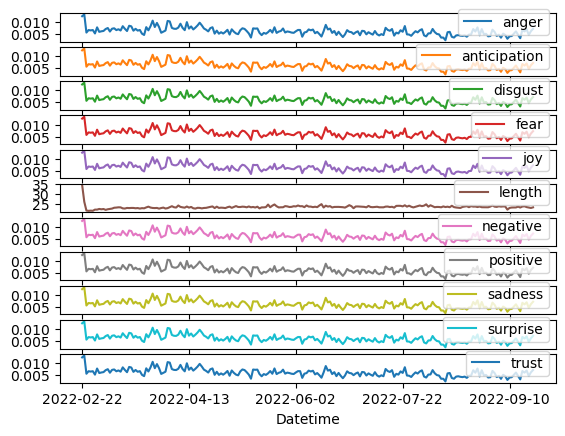

In [76]:
emo_pt.plot.line(subplots=True)

In [77]:
data.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet_id', 'Tweet_content',
       'Tweet_reply_count', 'Tweet_retweet_count', 'Tweet_like_count',
       'Tweet_quote_count', 'Tweet_hashtags', 'Username', 'User_id',
       'User_followers_count', 'User_friends_count', 'User_statuses_count',
       'User_favourites_count', 'User_listed_count', 'User_media_count',
       'HorA', 'care', 'fairness', 'loyalty', 'authority', 'purity',
       'authority_cat', 'care_cat', 'fairness_cat', 'purity_cat',
       'loyalty_cat', '30day_cut', 'Tweet_content_clean', 'url_num', 'at_num',
       'emoji_num', 'User_infuluence_score', 'emotions', 'positive',
       'negative', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'length'],
      dtype='object')

In [78]:
data['Tweet_be_retweeted'] = data['Tweet_retweet_count'].apply(lambda x: 0+(x>0))

In [97]:
data.to_csv("H:/课程/毕业论文/active_User_per_30_days_processed_emo.csv")

第二次运行从这里开始

In [2]:
data = pd.read_csv("H:/课程/毕业论文/active_User_per_30_days_processed_emo.csv")

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet_id,Tweet_content,Tweet_reply_count,Tweet_retweet_count,Tweet_like_count,Tweet_quote_count,Tweet_hashtags,...,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,length,Tweet_be_retweeted
0,0,0,2022-02-22,1496098801152512002,putins war ukraine russia crisis ukraina ...,0,0,1,0,"['PutinsWar', 'UkraineRussiaCrisis', 'Ukraina'...",...,0,0,0,0,0,0,0,0,19,0
1,1,1,2022-02-22,1496099780912881665,Proud moment for indiaTwo young shining stars...,0,0,1,0,"['India', 'Kashmir', 'India', 'Dubai', 'COVID1...",...,0,0,0,0,0,0,0,0,34,0
2,2,2,2022-02-22,1496103001903501319,Russia vs Ukraine War Update: Germany halts No...,1,0,1,0,"['Ukraine', 'UkraineRussiaCrisis', 'UkraineCon...",...,0,0,0,0,0,0,0,0,32,0
3,3,3,2022-02-22,1496107122718695424,putins war :Interesting details on other terr...,0,0,1,0,"['PutinsWar', 'SatansSpeech', 'PutinSpeech', '...",...,0,0,0,0,0,0,0,0,26,0
4,4,4,2022-02-22,1496107229929476105,"criminals in russia, iran, syria!are the w...",0,0,3,0,"['criminals', 'Russia', 'Iran', 'Syria', 'Cowa...",...,0,0,0,0,0,0,0,0,53,0


In [4]:
ddf = data[data['30day_cut']>=0].pivot_table(index=['User_id','30day_cut'], 
                                         values=['care','fairness','purity','authority','loyalty','HorA','emoji_num','url_num',
                                                 'User_followers_count','Tweet_retweet_count',
                                                 'Tweet_be_retweeted','Tweet_id', 'positive', 'negative', 'anger', 
                                                 'anticipation','disgust','fear','joy','sadness','surprise','trust'], 
                                         aggfunc={'care':np.mean,
                                                  'fairness':np.mean,
                                                  'purity':np.mean,
                                                  'authority':np.mean,
                                                  'loyalty':np.mean,
                                                  'HorA':np.mean,
                                                  'emoji_num':np.mean,
                                                  'url_num':np.mean,
                                                  'User_followers_count':np.mean,                                                
                                                  'Tweet_retweet_count':np.mean,
                                                  'Tweet_be_retweeted':np.mean,
                                                  'Tweet_id':len,
                                                  'positive':np.mean, 
                                                  'negative':np.mean,
                                                  'anger':np.mean, 
                                                  'anticipation':np.mean,
                                                  'disgust':np.mean,
                                                  'fear':np.mean,
                                                  'joy':np.mean,
                                                  'sadness':np.mean,
                                                  'surprise':np.mean,
                                                  'trust':np.mean})

In [5]:
ddf['User_followers_count_log'] = ddf['User_followers_count'].apply(lambda x:np.log(x+1))

In [6]:
ddf.describe()

,HorA,Tweet_be_retweeted,Tweet_id,Tweet_retweet_count,User_followers_count,anger,anticipation,authority,care,disgust,...,joy,loyalty,negative,positive,purity,sadness,surprise,trust,url_num,User_followers_count_log
count,94472.000000,94472.000000,94472.000000,94472.000000,9.447200e+04,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,...,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000,94472.000000
mean,0.054366,0.322008,27.730936,5.159436,2.713646e+04,0.007494,0.007494,0.029781,-0.204346,0.007494,...,0.007494,0.028979,0.007494,0.007494,0.013584,0.007494,0.007494,0.007494,0.478405,7.079374
std,0.136935,0.355062,106.227650,57.516253,3.493593e+05,0.048059,0.048059,0.104617,0.265016,0.048059,...,0.048059,0.125573,0.048059,0.048059,0.105394,0.048059,0.048059,0.048059,0.498710,2.193749
min,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.812500,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,2.943943e+02,0.000000,0.000000,0.000000,-0.349419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.688311
50%,0.000000,0.181818,8.000000,0.250000,1.153768e+03,0.000000,0.000000,0.000000,-0.155548,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,7.051655
75%,0.038462,0.542857,21.000000,1.090909,4.281260e+03,0.000000,0.000000,0.040000,0.000000,0.000000,...,0.000000,0.042208,0.000000,0.000000,0.008839,0.000000,0.000000,0.000000,0.919650,8.362236
max,1.000000,1.000000,9923.000000,6593.666667,1.767574e+07,3.000000,3.000000,0.950000,0.950000,3.000000,...,3.000000,0.975000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,5.000000,16.687704


In [7]:
ddf

HorA  Tweet_be_retweeted  Tweet_id  \
User_id             30day_cut                                           
1378                0          0.007168            0.159498       558   
                    1          0.004566            0.146119       219   
                    2          0.000000            0.132353        68   
                    3          0.000000            0.195652        46   
                    4          0.000000            0.138889        36   
...                                 ...                 ...       ...   
1506717607235182592 2          0.000000            0.000000         1   
                    3          0.000000            0.250000         4   
                    4          0.000000            0.000000         2   
                    5          0.000000            0.444444         9   
                    6          0.000000            0.200000         5   

                               Tweet_retweet_count  User_followers_count  \
User_id             30day_cut                                              
1378                0                     0.277778          15817.302867   
                    1                     0.178082          15826.968037   
                    2                     0.161765          15841.897059   
                    3                     0.260870          15851.695652   
                    4                     0.138889          15854.916667   
...                                            ...                   ...   
1506717607235182592 2                     0.000000             40.000000   
                    3                     0.250000             40.000000   
                    4                     0.000000             40.500000   
                    5                     1.222222             40.000000   
                    6                     0.400000             40.000000   

                                  anger  anticipation  authority      care  \
User_id             30day_cut                                                
1378                0          0.019713      0.019713   0.041622 -0.411163   
                    1          0.013699      0.013699   0.025209 -0.622084   
                    2          0.014706      0.014706   0.035638 -0.526144   
                    3          0.000000      0.000000   0.092585 -0.552907   
                    4          0.000000      0.000000   0.056713 -0.539043   
...                                 ...           ...        ...       ...   
1506717607235182592 2          0.000000      0.000000   0.000000 -0.833333   
                    3          0.000000      0.000000   0.072917 -0.208333   
                    4          0.000000      0.000000   0.000000 -0.898810   
                    5          0.000000      0.000000   0.015278 -0.708113   
                    6          0.000000      0.000000  -0.025000 -0.476667   

                                disgust  ...       joy   loyalty  negative  \
User_id             30day_cut            ...                                 
1378                0          0.019713  ...  0.019713  0.033132  0.019713   
                    1          0.013699  ...  0.013699  0.044747  0.013699   
                    2          0.014706  ...  0.014706  0.061180  0.014706   
                    3          0.000000  ...  0.000000  0.122768  0.000000   
                    4          0.000000  ...  0.000000  0.019965  0.000000   
...                                 ...  ...       ...       ...       ...   
1506717607235182592 2          0.000000  ...  0.000000  0.000000  0.000000   
                    3          0.000000  ...  0.000000  0.085938  0.000000   
                    4          0.000000  ...  0.000000  0.000000  0.000000   
                    5          0.000000  ...  0.000000  0.088889  0.000000   
                    6          0.000000  ...  0.000000  0.133750  0.000000   

                               positive    purity   sadness  surpr

In [8]:
#zero model
from linearmodels import PanelOLS
reg_fe = PanelOLS.from_formula('Tweet_be_retweeted ~User_followers_count_log +url_num+emoji_num+Tweet_id + EntityEffects+TimeEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Tweet_be_retweeted   R-squared:                        0.0045
Estimator:                   PanelOLS   R-squared (Between):             -2.5385
No. Observations:               94472   R-squared (Within):               0.0041
Date:                Sun, May 21 2023   R-squared (Overall):             -2.1784
Time:                        09:43:21   Log-likelihood                   2.8e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      92.107
Entities:                       13496   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(4,80966)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             92.107
                            

In [9]:
from linearmodels import PanelOLS
reg_fe = PanelOLS.from_formula('Tweet_be_retweeted ~ care+ HorA + fairness+ authority+ purity+ loyalty+ User_followers_count_log + EntityEffects+TimeEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Tweet_be_retweeted   R-squared:                        0.0005
Estimator:                   PanelOLS   R-squared (Between):             -2.6534
No. Observations:               94472   R-squared (Within):               0.0004
Date:                Sun, May 21 2023   R-squared (Overall):             -2.2776
Time:                        09:43:26   Log-likelihood                 2.781e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.3601
Entities:                       13496   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(7,80963)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             6.3601
                            

In [10]:
from linearmodels import PanelOLS
reg_fe = PanelOLS.from_formula('Tweet_be_retweeted ~ care*HorA+ fairness*HorA+ authority*HorA+ purity*HorA+ loyalty*HorA+ User_followers_count_log*HorA + EntityEffects+TimeEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Tweet_be_retweeted   R-squared:                        0.0008
Estimator:                   PanelOLS   R-squared (Between):             -2.6627
No. Observations:               94472   R-squared (Within):               0.0006
Date:                Sun, May 21 2023   R-squared (Overall):             -2.2855
Time:                        09:44:06   Log-likelihood                 2.782e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.7662
Entities:                       13496   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                F(13,80957)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             4.7662
                            

In [92]:
ddf

HorA  Tweet_be_retweeted  Tweet_id  \
User_id             30day_cut                                           
1378                0          0.007168            0.159498       558   
                    1          0.004566            0.146119       219   
                    2          0.000000            0.132353        68   
                    3          0.000000            0.195652        46   
                    4          0.000000            0.138889        36   
...                                 ...                 ...       ...   
1506717607235182592 2          0.000000            0.000000         1   
                    3          0.000000            0.250000         4   
                    4          0.000000            0.000000         2   
                    5          0.000000            0.444444         9   
                    6          0.000000            0.200000         5   

                               Tweet_retweet_count  User_followers_count  \
User_id             30day_cut                                              
1378                0                     0.277778          15817.302867   
                    1                     0.178082          15826.968037   
                    2                     0.161765          15841.897059   
                    3                     0.260870          15851.695652   
                    4                     0.138889          15854.916667   
...                                            ...                   ...   
1506717607235182592 2                     0.000000             40.000000   
                    3                     0.250000             40.000000   
                    4                     0.000000             40.500000   
                    5                     1.222222             40.000000   
                    6                     0.400000             40.000000   

                                  anger  anticipation  authority      care  \
User_id             30day_cut                                                
1378                0          0.019713      0.019713   0.041622 -0.411163   
                    1          0.013699      0.013699   0.025209 -0.622084   
                    2          0.014706      0.014706   0.035638 -0.526144   
                    3          0.000000      0.000000   0.092585 -0.552907   
                    4          0.000000      0.000000   0.056713 -0.539043   
...                                 ...           ...        ...       ...   
1506717607235182592 2          0.000000      0.000000   0.000000 -0.833333   
                    3          0.000000      0.000000   0.072917 -0.208333   
                    4          0.000000      0.000000   0.000000 -0.898810   
                    5          0.000000      0.000000   0.015278 -0.708113   
                    6          0.000000      0.000000  -0.025000 -0.476667   

                                disgust  ...       joy   loyalty  negative  \
User_id             30day_cut            ...                                 
1378                0          0.019713  ...  0.019713  0.033132  0.019713   
                    1          0.013699  ...  0.013699  0.044747  0.013699   
                    2          0.014706  ...  0.014706  0.061180  0.014706   
                    3          0.000000  ...  0.000000  0.122768  0.000000   
                    4          0.000000  ...  0.000000  0.019965  0.000000   
...                                 ...  ...       ...       ...       ...   
1506717607235182592 2          0.000000  ...  0.000000  0.000000  0.000000   
                    3          0.000000  ...  0.000000  0.085938  0.000000   
                    4          0.000000  ...  0.000000  0.000000  0.000000   
                    5          0.000000  ...  0.000000  0.088889  0.000000   
                    6          0.000000  ...  0.000000  0.133750  0.000000   

                               positive    purity   sadness  surpr

In [11]:
#仇恨言论与道德叙事
reg_fe = PanelOLS.from_formula('HorA ~ care + fairness + authority + purity + loyalty + emoji_num + url_num +User_followers_count_log+EntityEffects +TimeEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   HorA   R-squared:                        0.0073
Estimator:                   PanelOLS   R-squared (Between):             -0.0886
No. Observations:               94472   R-squared (Within):               0.0073
Date:                Sun, May 21 2023   R-squared (Overall):             -0.0407
Time:                        09:44:32   Log-likelihood                  8.01e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      74.072
Entities:                       13496   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(8,80962)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             74.072
                            

In [12]:
#仇恨言论与道德叙事
reg_fe = PanelOLS.from_formula('HorA ~ positive +negative +anger +anticipation +disgust\
                                +fear +joy +sadness +surprise +trust +EntityEffects +TimeEffects', data=ddf)
results_fe = reg_fe.fit()
print(results_fe)

ValueError: exog does not have full column rank. If you wish to proceed with model estimation irrespective of the numerical accuracy of coefficient estimates, you can set check_rank=False.

In [13]:
ddf.count()

HorA                        94472
Tweet_be_retweeted          94472
Tweet_id                    94472
Tweet_retweet_count         94472
User_followers_count        94472
anger                       94472
anticipation                94472
authority                   94472
care                        94472
disgust                     94472
emoji_num                   94472
fairness                    94472
fear                        94472
joy                         94472
loyalty                     94472
negative                    94472
positive                    94472
purity                      94472
sadness                     94472
surprise                    94472
trust                       94472
url_num                     94472
User_followers_count_log    94472
dtype: int64

In [21]:
ddf.columns

Index(['HorA', 'Tweet_be_retweeted', 'Tweet_id', 'Tweet_retweet_count',
       'User_followers_count', 'anger', 'anticipation', 'authority', 'care',
       'disgust', 'emoji_num', 'fairness', 'fear', 'joy', 'loyalty',
       'negative', 'positive', 'purity', 'sadness', 'surprise', 'trust',
       'url_num', 'User_followers_count_log'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

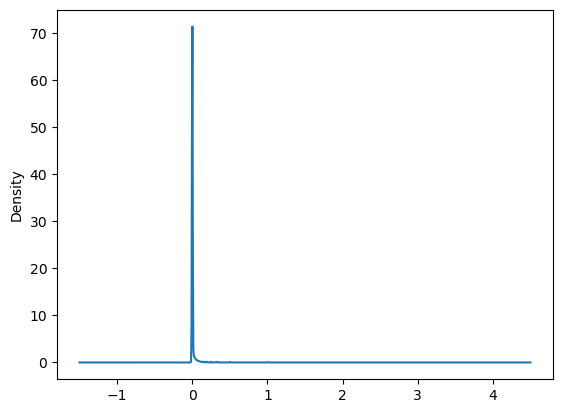

In [25]:
ddf['joy'].plot.density()

<AxesSubplot:ylabel='Density'>

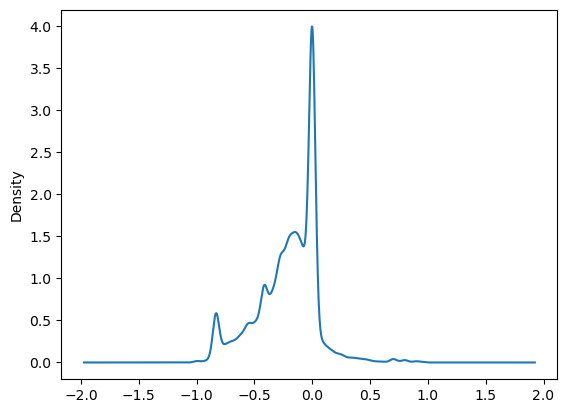

In [26]:
ddf['care'].plot.density()

没办法将情感词数量纳入回归：绝大多数都是0